In [1]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("water_potability.csv")

# Display first 5 rows
df.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [2]:
# Check how many missing values are present in each column
df.isnull().sum()


ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [3]:
# Fill missing values using median of each column
df['ph'] = df['ph'].fillna(df['ph'].median())
df['Sulfate'] = df['Sulfate'].fillna(df['Sulfate'].median())
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df['Trihalomethanes'].median())

# Check again to confirm no missing values remain
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [4]:
# Basic statistical summary of the dataset
df.describe()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.074194,196.369496,22014.092526,7.122277,333.608364,426.205111,14.284970,66.407478,3.966786,0.390110
std,1.470040,32.879761,8768.570828,1.583085,36.143851,80.824064,3.308162,15.769958,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


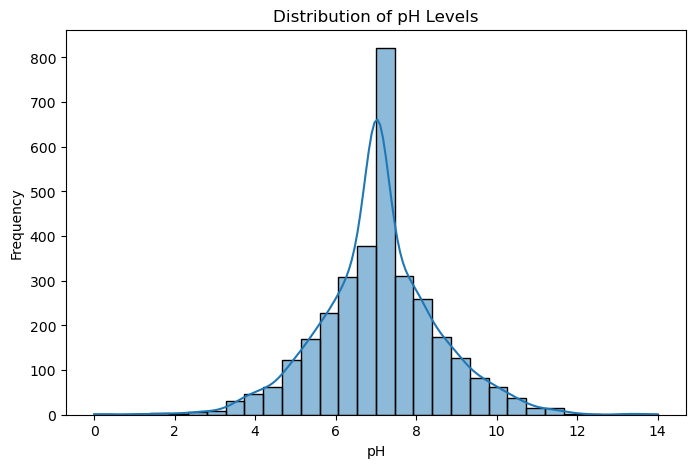

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution plot for pH
plt.figure(figsize=(8,5))
sns.histplot(df['ph'], kde=True, bins=30)
plt.title("Distribution of pH Levels")
plt.xlabel("pH")
plt.ylabel("Frequency")
plt.show()


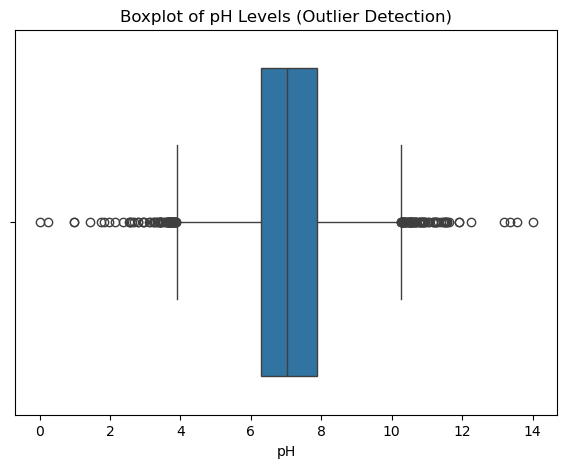

In [6]:
plt.figure(figsize=(7,5))
sns.boxplot(x=df['ph'])
plt.title("Boxplot of pH Levels (Outlier Detection)")
plt.xlabel("pH")
plt.show()


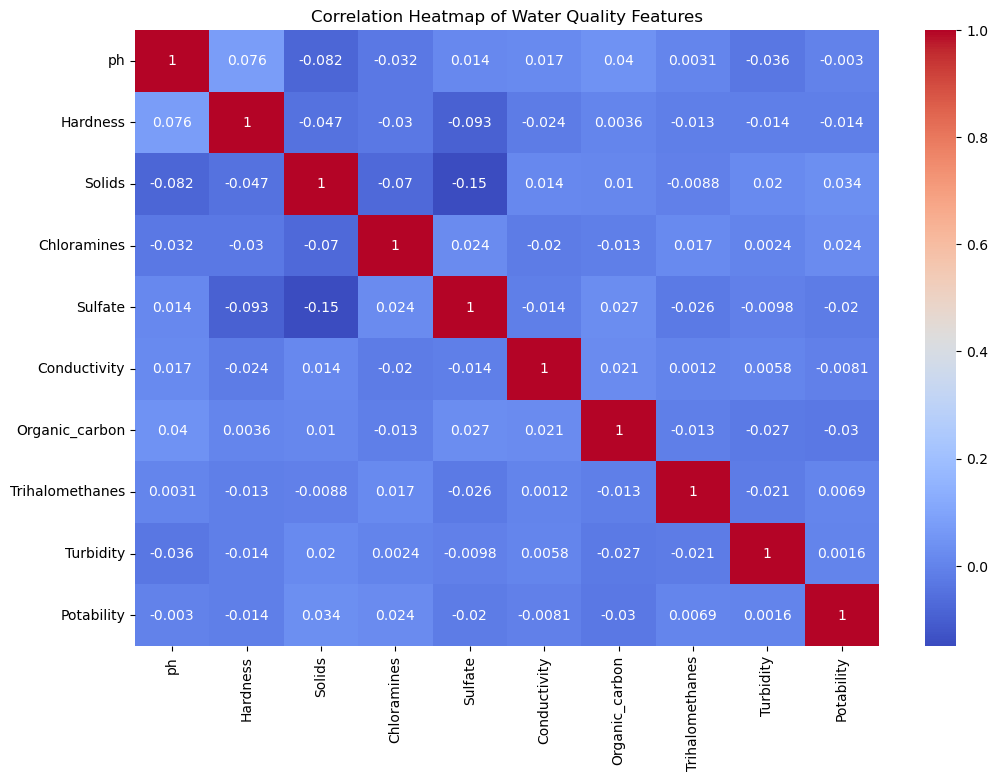

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Water Quality Features")
plt.show()


In [8]:
from sklearn.model_selection import train_test_split

# Features (all columns except Potability)
X = df.drop('Potability', axis=1)

# Target (Potability column)
y = df['Potability']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((2620, 9), (656, 9))

In [9]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit scaler on training data and transform
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data (DO NOT fit again)
X_test_scaled = scaler.transform(X_test)

X_train_scaled[:5]  # Show first 5 scaled rows


array([[-0.31281161,  0.20204646, -0.55463361, -0.66652723, -0.60194948,
        -0.19929648,  0.50622105, -0.08500622, -1.3411035 ],
       [-0.27104344, -0.08006604,  1.36873646,  1.74381264,  0.30451231,
         0.88258563, -1.65420736,  0.01838272,  0.09082874],
       [-0.16754964,  0.28302115, -0.42399002, -0.24879087, -0.98568239,
         0.83848598, -0.13486017,  0.27430307,  1.27418303],
       [-0.03032472, -0.39787949, -1.06308631,  1.6816065 , -0.37693602,
         0.69017227, -0.28685089, -1.2316548 , -0.92358399],
       [-0.46106117, -0.41641338, -0.47722703,  0.22352046, -0.02837272,
        -0.34051774,  0.92855393, -0.14502746,  0.7882605 ]])

In [10]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=200, 
    random_state=42
)

# Train the model
rf_model.fit(X_train_scaled, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the test set
y_pred = rf_model.predict(X_test_scaled)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.6814024390243902

In [12]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.87      0.78       412
           1       0.63      0.36      0.45       244

    accuracy                           0.68       656
   macro avg       0.66      0.62      0.61       656
weighted avg       0.67      0.68      0.66       656

Confusion Matrix:
[[360  52]
 [157  87]]


In [13]:
import numpy as np

# Get feature importances from the model
importances = rf_model.feature_importances_
feature_names = X.columns

# Combine into a dataframe for readability
fi_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

fi_df


,Feature,Importance
0,ph,0.126381
4,Sulfate,0.125032
1,Hardness,0.121435
3,Chloramines,0.114420
2,Solids,0.112022
6,Organic_carbon,0.104262
5,Conductivity,0.102765
7,Trihalomethanes,0.098303
8,Turbidity,0.095378


In [14]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize Grid Search
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,                # 3-fold cross validation
    n_jobs=-1,           # Use all CPU cores
    verbose=1
)

# Fit on training data
grid_search.fit(X_train_scaled, y_train)

# Best model
best_model = grid_search.best_estimator_

best_model


Fitting 3 folds for each of 36 candidates, totalling 108 fits


RandomForestClassifier(max_depth=30, min_samples_split=5, n_estimators=300,
                       random_state=42)

In [15]:
# Predictions using the tuned model
y_pred_best = best_model.predict(X_test_scaled)

# Accuracy
best_accuracy = accuracy_score(y_test, y_pred_best)
print("Accuracy after tuning:", best_accuracy)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))


Accuracy after tuning: 0.6890243902439024

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.88      0.78       412
           1       0.65      0.36      0.46       244

    accuracy                           0.69       656
   macro avg       0.67      0.62      0.62       656
weighted avg       0.68      0.69      0.66       656


Confusion Matrix:
[[364  48]
 [156  88]]


In [17]:
# Create a new dataframe for Power BI
output_df = X_test.copy()
output_df['Actual_Potability'] = y_test.values
output_df['Predicted_Potability'] = y_pred_best

# Save to CSV
output_df.to_csv("AquaSense_Predictions.csv", index=False)

output_df.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Actual_Potability,Predicted_Potability
2947,7.036752,183.521107,20461.252710,7.333212,333.119476,356.369022,20.179029,67.019903,4.886634,0,0
2782,6.643159,188.913541,32873.820022,6.791509,333.848842,336.561501,14.706810,67.844849,4.562198,1,0
1644,7.846058,224.058877,23264.109968,5.922367,300.402620,387.971336,13.406737,43.075186,2.487969,0,0
70,7.160467,183.089310,6743.346066,3.803036,277.599099,428.036344,9.799625,90.035374,3.884891,0,0
2045,6.615350,179.240661,26392.863612,9.309160,333.073546,496.363562,12.786595,78.262369,4.453443,1,0
